In [5]:
def min_distance(distances,visited):
    min_val = float('inf')
    min_index = -1

    for i in range(len(distances)):
        if distances[i] < min_val and i not in visited:
            min_val = distances[i]
            min_index = i

    return min_index


def dijkstra(graph,start):
    num_nodes = len(graph)

    distances = [float('inf')] * num_nodes
    visited = []
    distances[start]=0

    for i in range(num_nodes):
        current_node = min_distance(distances,visited)
        visited.append(current_node)

        for j in range(num_nodes):
            if graph[current_node][j] != 0:
                new_distance = distances[current_node] + graph[current_node][j]

                if new_distance < distances[j]:
                    distances[j] = new_distance

    return distances


graph = [[0, 7, 9, 8, 8, 14],
        [7, 8, 10, 15, 0, 0],
        [9, 10, 0, 11, 0, 2],
        [0, 15, 11, 0, 6, 0],
        [0, 0, 0, 6, 0, 9],
        [14, 0, 2, 0, 9, 8, 10]]


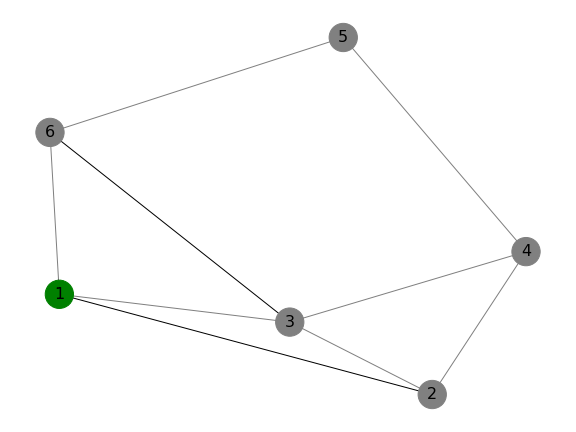

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import imageio
import os
import os
import shutil
import heapq

def draw_graph(G, node_colors, edge_colors, pos, frame_id):
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=node_colors, edge_color=edge_colors, with_labels=True, node_size=800, font_size=16)
    plt.savefig(f"frames/frame_{frame_id:03d}.png")
    plt.close()

def animate_dijkstra(graph, start_node):
    os.makedirs("frames",exist_ok=True)
    frame_id = 0 
    pos = nx.spring_layout(graph, seed=42)
    visited = {node:False for node in graph.nodes}
    distances = {node:float('inf') for node in graph.nodes}
    distances[start_node] = 0
    pq = [{0, start_node}]

    while pq:
        current_distance, current_node = heapq.heappop(pq)
        if visited[current_node]:
            continue
        visited[current_node] = True

        node_colors = ["green" if node == current_node else ("red" if visited[node] else "gray") for node in graph.nodes ]
        edge_colors = ["black" if visited[node] else "gray" for node in graph.nodes]
        draw_graph(graph, node_colors, edge_colors, pos, frame_id)
        frame_id += 1

        for neighbor, edge_weight in graph[current_node].items():
            new_distance = current_distance + edge_weight["weight"]
            if not visited[neighbor] and new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                heapq.heappush(pq, (new_distance, neighbor))

    images = []
    for i in range(frame_id):
        images.append(imageio.imread(f"frames/frame_{i:03d}.png"))
    imageio.mimsave("dijkstra.gif", images, duration=1)

    shutil.rmtree("frames")

G = nx.Graph()
G.add_weighted_edges_from([(1, 2, 7), (1, 3, 9), (1, 6, 14), (2, 3, 10), (2, 4, 15),
                           (3, 4, 11), (3, 6, 2), (4, 5, 6), (5, 6, 9)])

animate_dijkstra(G, 1)

from IPython.display import Image
Image(filename="dijkstra.gif")

In [3]:
class Graph:
    def __init__(self, size):
        self.adj_matrix = [[0] * size for _ in range(size)]  
        self.size = size
        self.vertex_data = [''] * size

    def add_edge(self, u, v, weight):
        if 0 <= u < self.size and 0 <= v < self.size:
            self.adj_matrix[u][v] = weight
            self.adj_matrix[v][u] = weight # For undirected graph

    def add_vertex_data(self, vertex, data):
        if 0 <= vertex < self.size:
            self.vertex_data[vertex] = data  

    def dijkstra(self, start_vertex_data):
        start_vertex = self.vertex_data.index(start_vertex_data)  
        distances = [float('inf')] * self.size
        distances[start_vertex] = 0
        visited = [False] * self.size
        for _ in range(self.size):
            min_distance = float('inf')
            u = None
            for i in range(self.size): 
                if not visited[i] and distances[i] < min_distance:  
                    min_distance = distances[i]
                    u = i 
            if u is None: 
                break
            visited[u] = True
            for v in range(self.size):
                if self.adj_matrix[u][v] != 0 and not visited[v]:  
                    alt = distances[u] + self.adj_matrix[u][v]  
                    if alt < distances[v]:
                        distances[v] = alt 
        return distances

g = Graph(7)
g.add_vertex_data(0, 'A')
g.add_vertex_data(1, 'B')
g.add_vertex_data(2, 'C')
g.add_vertex_data(3, 'D')
g.add_vertex_data(4, 'E')
g.add_vertex_data(5, 'F')
g.add_vertex_data(6, 'G')

g.add_edge(3, 0, 4) # D - A, weight 5
g.add_edge(3, 4, 2) # D - E, weight 2
g.add_edge(0, 2, 3) # A - C, weight 3
g.add_edge(0, 4, 4) # A - E, weight 4
g.add_edge(4, 2, 4) # E - C, weight 4
g.add_edge(4, 6, 5) # E - G, weight 5
g.add_edge(2, 5, 5) # C - F, weight 5
g.add_edge(2, 1, 2) # C - B, weight 2
g.add_edge(1, 5, 2) # B - F, weight 2
g.add_edge(6, 5, 5) # G - F, weight 5 

# Dijkstra's algorithm from D to all vertices
print("Dijkstra's Algorithm starting from vertex D:\n") 
distances = g.dijkstra('D')
for i, d in enumerate(distances):
    print(f"Shortest distance from D to {g.vertex_data[i]}: {d}") 

Dijkstra's Algorithm starting from vertex D:

Shortest distance from D to A: 4
Shortest distance from D to B: 8
Shortest distance from D to C: 6
Shortest distance from D to D: 0
Shortest distance from D to E: 2
Shortest distance from D to F: 10
Shortest distance from D to G: 7


In [4]:
import heapq
import sys

def min_product_path(N, edges, S, D):
    # Buat graf sebagai adjacency list
    graph = [[] for _ in range(N)]
    for u, v, w in edges:
        graph[u].append((v, w))
    
    # Inisialisasi jarak
    INF = float('inf')
    dist = [INF] * N
    dist[S] = 1
    
    # Priority queue (min-heap)
    pq = [(1, S)]  # (current_product, node)
    
    while pq:
        curr_dist, u = heapq.heappop(pq)
        
        if curr_dist > dist[u]:
            continue
        
        for v, weight in graph[u]:
            new_dist = curr_dist * weight
            if new_dist < dist[v]:
                dist[v] = new_dist
                heapq.heappush(pq, (new_dist, v))
    
    return dist[D] if dist[D] != INF else -1

# Contoh penggunaan
N = 4
edges = [
    (0, 1, 2),
    (0, 2, 3),
    (1, 2, 1),
    (1, 3, 4),
    (2, 3, 2)
]
S = 0
D = 3

print(min_product_path(N, edges, S, D))  # Output yang diharapkan: 8


4
